In [ ]:
import numpy as np
from scipy import linalg

# Задача Дирихле для уравнения Пуассона

Задача Дирихле для уравнения Пуассона в общем виде выглядит следующим образом:
$$
\left\{
\begin{array}{l l}
\Delta{u} = -f(\vec{x}), & \vec{x} \in G, \\
u = \mu (\vec{x}), & \vec{x} \in \partial G. \\
\end{array}
\right.$$

Здесь Вам предстоит решить следующую задачу для двумерного уравнения:
$$
\begin{array}{l}
\Delta{u} = 4, \; x \in (0;1), \; y \in (0;1), \\
\left.u\right|_{x = 0} = y^2, \; \left.u\right|_{x = 1} = 1 + y^2, \; \left.u\right|_{y = 0} = x^2, \; \left.u\right|_{y = 1} = 1 + x^2. \\
\end{array}$$

Точным решением этого уравнения является функция $u(x, y) = x^2 + y^2$.

Для того, чтобы численно решить эту задачу, введём сетку на двумерной области её определения и запишем задачу на пятиточечном шаблоне.

$$
\frac{y_{i + 1, j} - 2y_{i, j} + y_{i - 1, j}}{h^2} + \frac{y_{i, j + 1} - 2y_{i, j} + y_{i, j - 1}}{h^2} = 
4.$$

Граничные условия для сеточной функции $y$ примут вид:
$$y_{0, j} = y_j^2,\;y_{N, j} = 1 + y_j^2,\;y_{i, 0} = x_i^2,\;y_{i, N} = 1 + x_i^2$$

Вам предлагается решить это конечно-разностное уравнение одним из двух способов: методом Зейделя или методом Фурье.

## Метод Зейделя 

Метод заключается в составлении системы линейных уравнений для вектора решения.

Алгоритм метода:
1. "Вытяните" решение. Произведите замену матрицы $(N+1) \times (N+1)$ значений сеточной функции на вектор длины $(N+1)^2$.
2. Найдите новые индексы известных значений граниных условий.
3. Исключите известные значения из системы уравнений.
4. Запишите систему в матричном виде. Решите её итерационным методом Зейделя.

Запрограммируйте метод Зейделя численного решения уравнения Пуассона, используя функции `scipy`.

In [ ]:
def seidel_poisson(h, tol=1e-3):
    """ Solve Poisson equation `Δ u = 4` with Seidel method.
    
    Parameters
    ----------
    h : float
       Spatial step
    tol : float, optional
       Tolerance for Seidel iterations
       
    Returns
    -------
    x_grid: ndarray, shape (N+1,)
       Grid along x-axis
    y_grid: ndarray, shape (N+1,)
       Grid along y-axis
    niter : integer
       Number of Seidel iterations
    u_sol : ndarray, shape (N+1,N+1)
       Solution of the scheme
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return x_grid, y_grid, niter, u_sol

Протестируйте функцию.

In [ ]:
from numpy.testing import assert_allclose
u = lambda x, y: x**2 + y**2

x_1, y_1, nit_1, u_num_1 = seidel_poisson(0.1)
assert_allclose(u_num_1, u(x_1[:, None], y_1[None, :]), atol=1e-2)


Постройте решение конечно-разностного уравнения с любым шагом и сравните его с точным решением (постройте график ошибки).

In [ ]:
# YOUR CODE HERE

## Метод Фурье

Решение задачи Дирихле для уравнения Пуассона общего вида можно представить в узлах сетки в виде линейной комбинации собственных функций конечно-разностного оператора второй производной
$$y_{k, l} = \sum\limits_{s = 1}^{N-1} c_s(k) \sqrt{\dfrac{2}{a}} \sin{\dfrac{\pi s l}{N}} \; \forall k = \overline{0,N}, $$
где $a$ - длина отрезка области определения задачи.

Функцию правой части в узлах сетки можно представить таким же образом:
$$f_{k, l} = \sum\limits_{s = 1}^{N-1} \hat{f_s}(k) \sqrt{\dfrac{2}{a}} \sin{\dfrac{\pi s l}{N}} \; \forall k = \overline{0,N},$$
где $\hat{f_s}(k) = h \sum\limits_{l = 1}^{N-1} f_{k, l} \sqrt{\dfrac{2}{a}} \sin{\dfrac{\pi s l}{N}}$.

Подставив соответствующие разложения в исходное конечно-разностное уравнение Пуассона, получим систему
$$
\left\{
\begin{array}{l}
\dfrac{c_s(k+1) - 2 c_s(k) + c_s(k-1)}{h^2} - \lambda_s c_s(k) = \hat{f_s}(k), \\
c_s(0) = c_s(N) = 0,
\end{array}
\right.$$
где $\lambda_s = \dfrac{4}{h^2} \sin^2{\dfrac{\pi s}{2 N}}$ - собственные числа конечно-разностного оператора второй производной.

Алгоритм метода:
1. Найдите коэффициенты $\hat{f_s}(k)$.
1. Решите трёхдиагональную систему уравнений для набора коэффициентов $c_s$.
3. Восстановите решение $y_{k, l}$.

Запрограммируйте метод Фурье численного решения уравнения Пуассона, используя функции `scipy`.

In [ ]:
import scipy
from matplotlib import pyplot as plt

from numpy.testing import assert_allclose
u = lambda x, y: x**2 + y**2

In [ ]:
def fourier_poisson(h):
    """ Solve Poisson equation `Δ u = 4` with Fourier method.

    Parameters
    ----------
    h : float
       Spatial step

    Returns
    -------
    x_grid: ndarray, shape (N+1,)
       Grid along x-axis
    y_grid: ndarray, shape (N+1,)
       Grid along y-axis
    u_sol : ndarray, shape (N+1,N+1)
       Solution of the scheme
    """
    a = 1
    N = round(1/h)
    x_grid = np.linspace(0, 1, N+1)
    y_grid = np.linspace(0, 1, N+1)

    u_sol = np.empty((N+1, N+1)) * np.nan
    u_sol[0] = y_grid**2
    u_sol[:, 0] = x_grid**2
    u_sol[-1] = 1 + y_grid**2
    u_sol[:, -1] = 1 + x_grid**2

    def ftilda(k, l):
      if k == 0 or l == 0:
        return np.nan
      res = -4
      if k == 1:
          res += u_sol[0, l]/h**2
      if l == 1:
          res += u_sol[k, 0]/h**2
      if k == N-1:
          res += u_sol[N, l]/h**2
      if l == N-1:
          res += u_sol[k, N]/h**2
      return res
      
    # g[s](l) := g_s(l)
    g = [lambda l, s=s: np.sqrt(2/a) * np.sin(np.pi * s * l / N) for s in range(N+1)]
    g[0] = g[N] = lambda l: np.nan

    # λ[s] := λ_s
    λ = [4 * np.sin(np.pi * s * h / (2*a))**2 / h**2 for s in range(N+1)]
    λ[0] = λ[N] = np.nan

    def fft(x):
      n = len(x)
      new_x = np.zeros((n+1)*2)
      new_x[1:n+1] = x
      res = scipy.fft.rfft(new_x)
      return -res.imag * h * np.sqrt(2/a)

    # fhat[s, k] := fhat_s(k)
    fhat = np.empty((N+1, N+1))
    for k in range(1, N):
      fhat[:, k] = fft([ftilda(k, l) for l in range(1, N)])
    fhat[0] = fhat[N] = fhat[:, 0] = fhat[:, N] = np.nan

    # c[s][k] := c_s(k)
    c = [np.nan] * (N+1)
    for s in range(1, N):        
        A_banded = np.empty((3, N-1))
        A_banded[0] = A_banded[2] = 1/h**2
        A_banded[1] = -(2/h**2 + λ[s])
        
        b = -fhat[s, 1:N]

        c[s] = [np.nan] * (N+1)
        c[s][1:N] = linalg.solve_banded((1, 1), A_banded, b)
        
    for k in range(1, N):
        for l in range(1, N):
            u_sol[k, l] = sum(c[s][k] * g[s](l) for s in range(1, N))

    return x_grid, y_grid, u_sol

Протестируйте функцию.

In [ ]:
x_1, y_1, u_num_1 = fourier_poisson(0.1)
assert_allclose(u_num_1, u(x_1[:, None], y_1[None, :]), atol=1e-5)





























Постройте решение конечно-разностного уравнения с любым шагом и сравните его с точным решением (постройте график ошибки).

In [ ]:
# ошибка для разных h
hs = 1/np.arange(3, 75)
diff_integral = hs**2
for i in range(len(hs)):
  x_1, y_1, u_num_1 = fourier_poisson(hs[i])
  diff = np.abs(u_num_1 - u(x_1[:, None], y_1[None, :]))
  row_diff = (diff[:, 0] + diff[:, -1])/2 + np.sum(diff[:, 1:-1], axis=1)
  diff_integral[i] *= (row_diff[0] + row_diff[-1])/2 + np.sum(row_diff[1:-1])

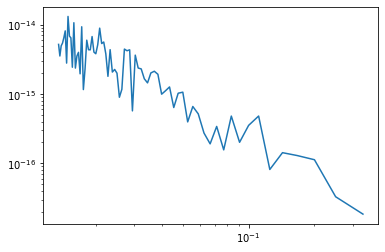

In [ ]:
plt.plot(hs, diff_integral)
plt.xscale('log')
plt.yscale('log')